In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv into df
df = pd.read_csv('Cardiotocographic.csv')

In [14]:
# Observe the first five rows of data
display(df.head())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# Get info about the null values and datatypes in data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [5]:
# We can also find out number of null values using isnull()
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
# Imputing missing values using the mean for each column
df.fillna(df.mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
# Detecting and treating outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = df[~outlier_condition]

data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 1 to 2120
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        883 non-null    float64
 1   AC        883 non-null    float64
 2   FM        883 non-null    float64
 3   UC        883 non-null    float64
 4   DL        883 non-null    float64
 5   DS        883 non-null    float64
 6   DP        883 non-null    float64
 7   ASTV      883 non-null    float64
 8   MSTV      883 non-null    float64
 9   ALTV      883 non-null    float64
 10  MLTV      883 non-null    float64
 11  Width     883 non-null    float64
 12  Tendency  883 non-null    float64
 13  NSP       883 non-null    float64
dtypes: float64(14)
memory usage: 103.5 KB


In [8]:
# Providing a statistical summary for each variable including measures of central tendency and dispersion
descriptive_stats = data_no_outliers.describe().T

# Adding interquartile range to the summary
descriptive_stats['IQR'] = descriptive_stats['75%'] - descriptive_stats['25%']

display(descriptive_stats)

,count,mean,std,min,25%,50%,75%,max,IQR
LB,883.0,131.842621,9.461012,106.000000,125.000000,133.000000,138.000000,160.000000,13.000000
AC,883.0,0.004071,0.003726,-0.000122,0.000000,0.003350,0.006719,0.013861,0.006719
FM,883.0,0.000603,0.001337,-0.002467,0.000000,0.000000,0.000336,0.006272,0.000336
UC,883.0,0.004952,0.002718,-0.000101,0.003098,0.005051,0.006927,0.012072,0.003830
DL,883.0,0.001545,0.002218,-0.000124,0.000000,0.000000,0.003084,0.008197,0.003084
DS,883.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,883.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,883.0,42.401260,15.079872,15.000000,29.000000,41.000000,56.000000,79.000000,27.000000
MSTV,883.0,1.271275,0.538496,0.300000,0.900000,1.200000,1.600000,3.200000,0.700000
ALTV,883.0,3.170071,6.036208,-1.043619,0.000000,0.000000,4.000000,27.000000,4.000000


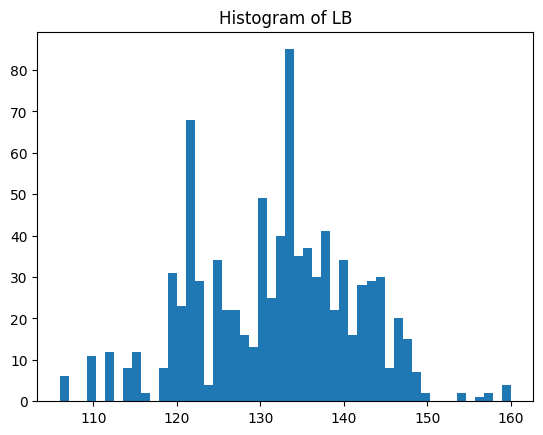

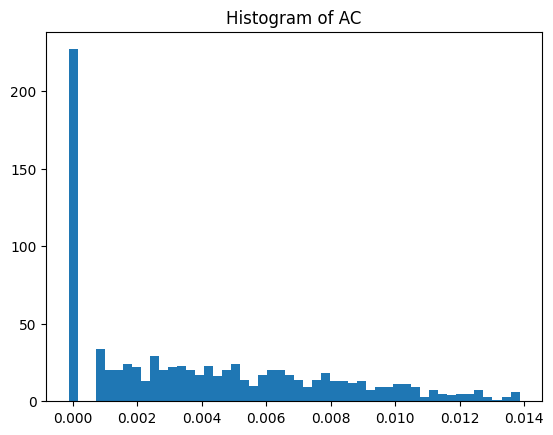

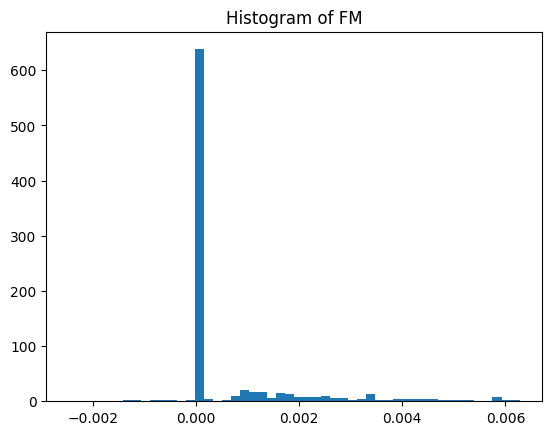

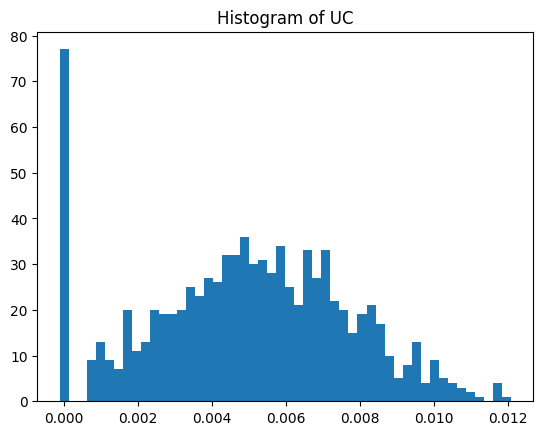

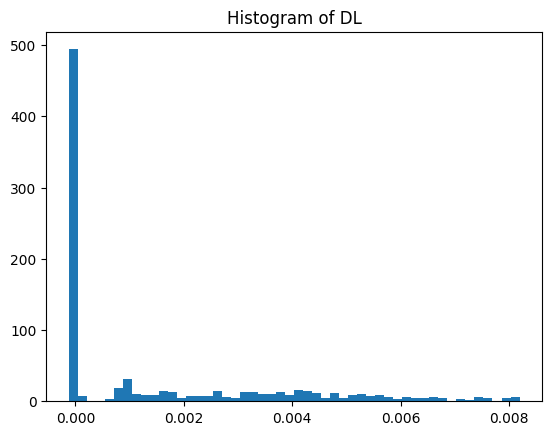

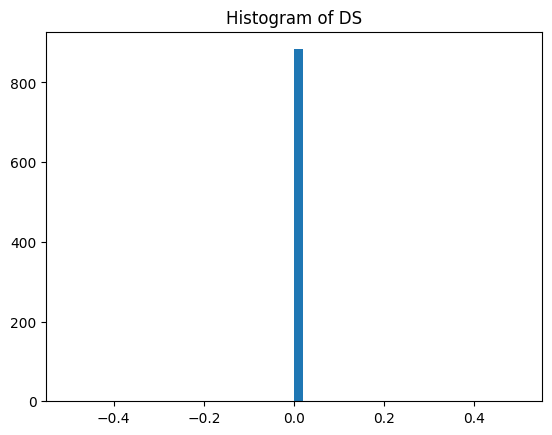

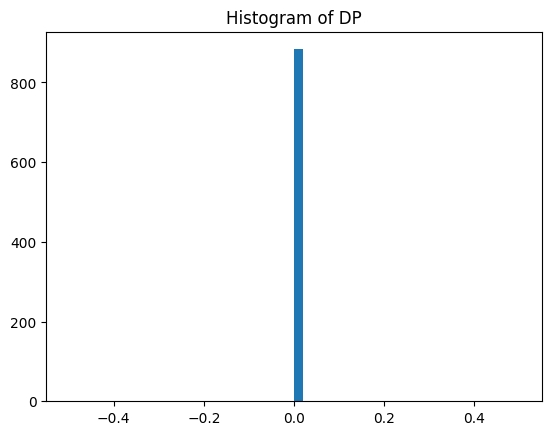

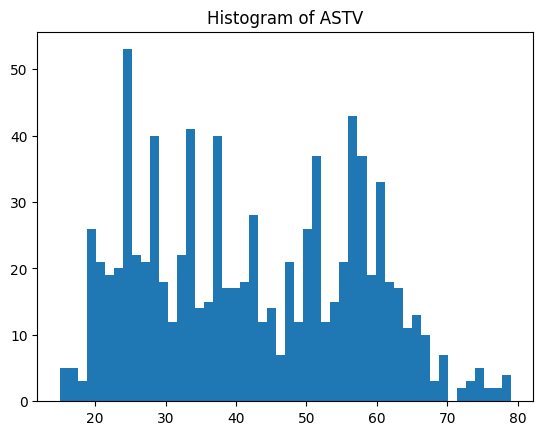

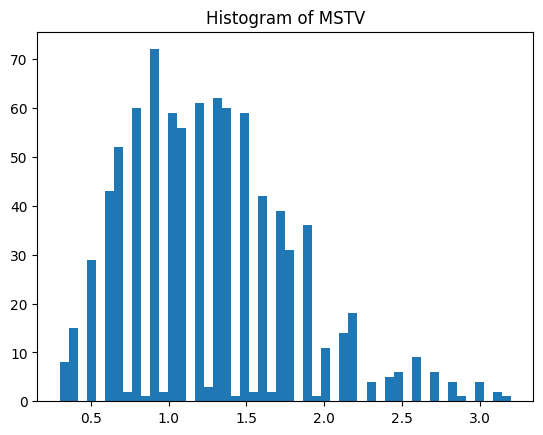

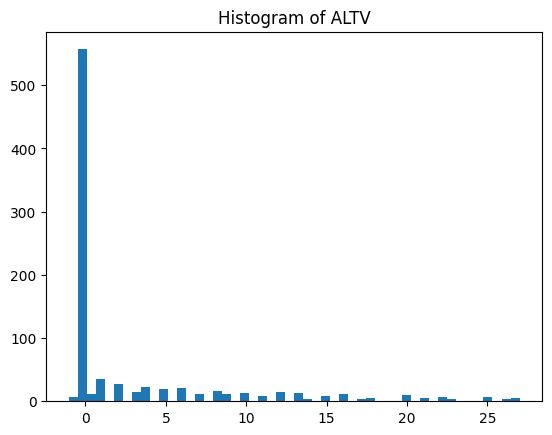

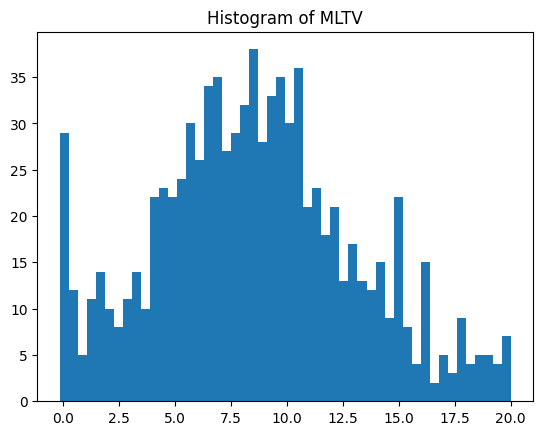

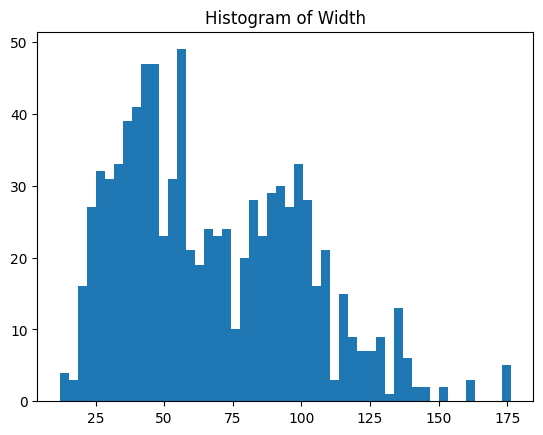

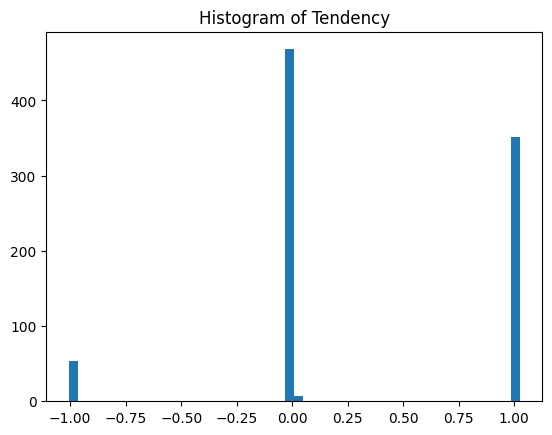

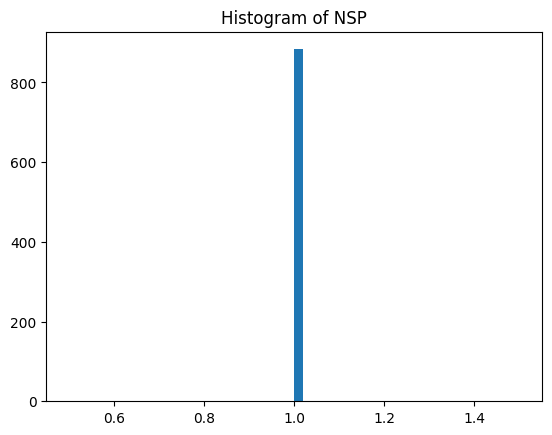

In [9]:
# Creating histograms for the numerical variables
columns_to_plot = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for column in columns_to_plot:
    plt.hist(data=data_no_outliers, x=column, bins=50)
    plt.title(f'Histogram of {column}')
    plt.show()

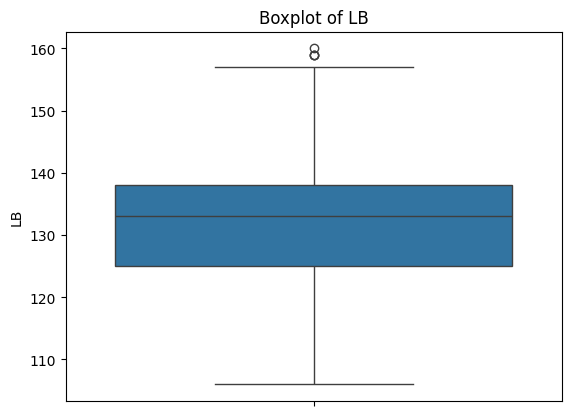

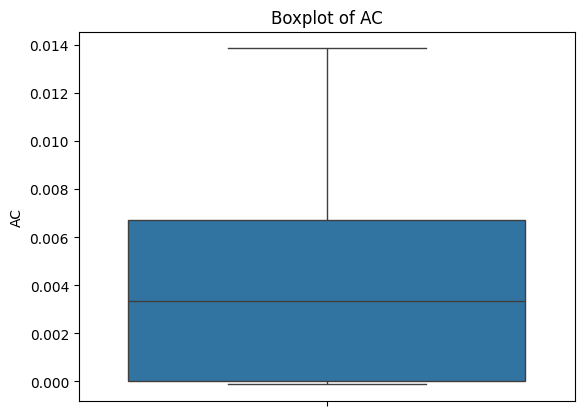

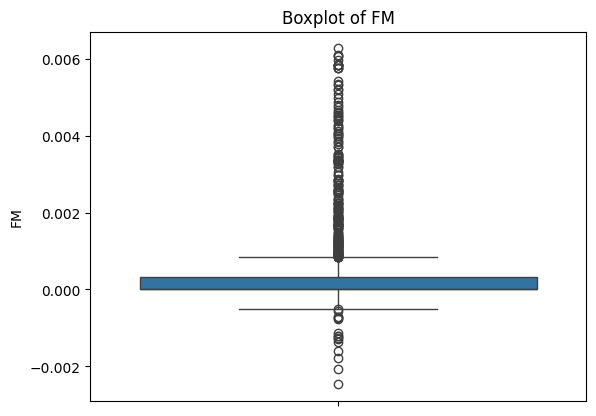

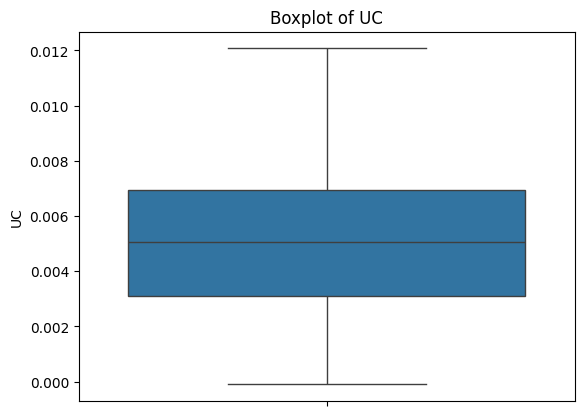

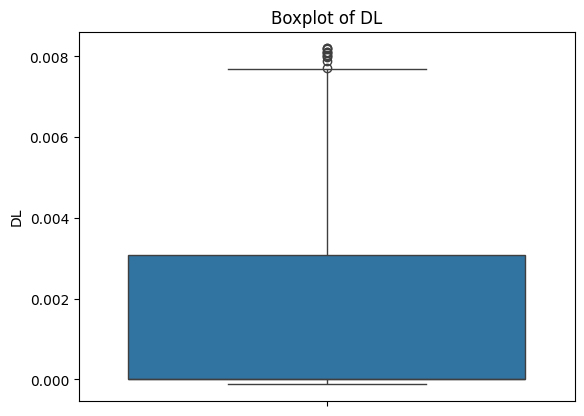

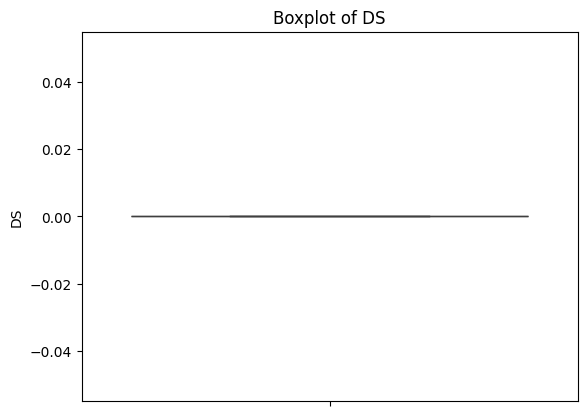

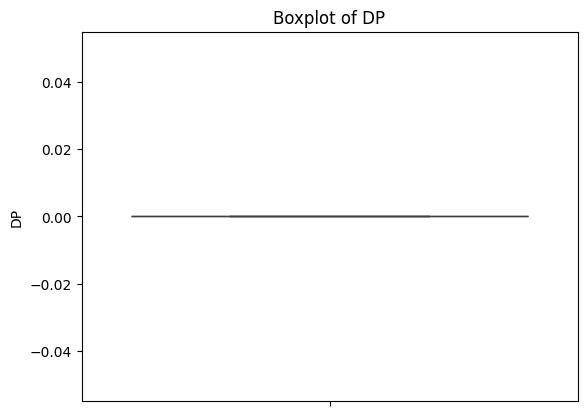

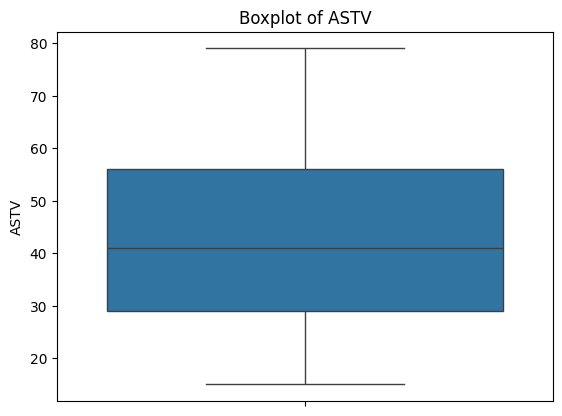

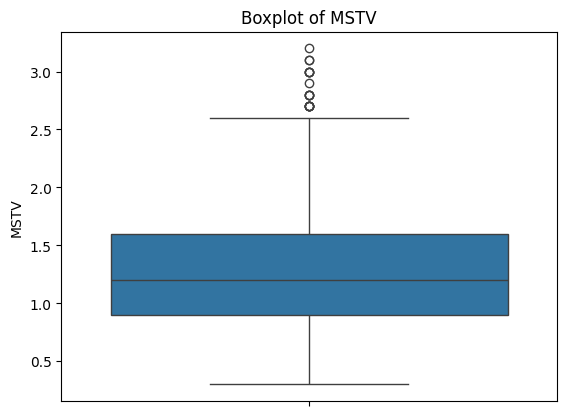

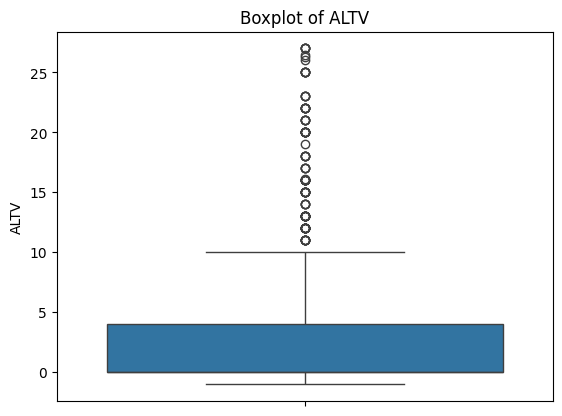

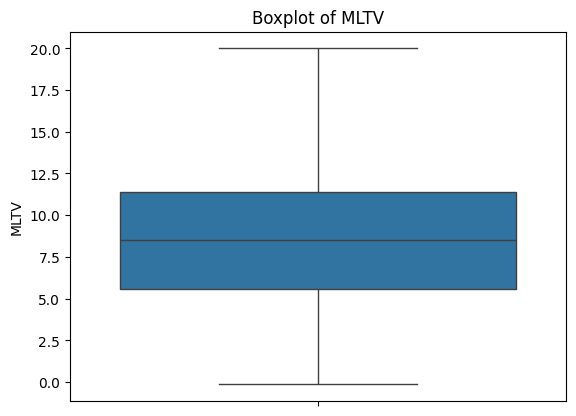

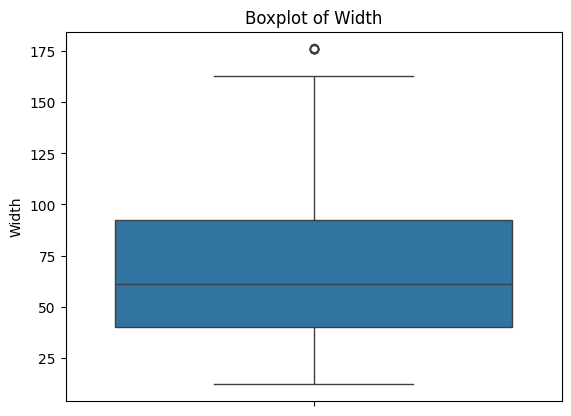

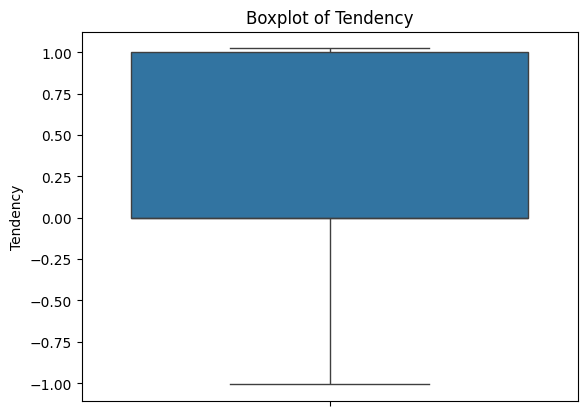

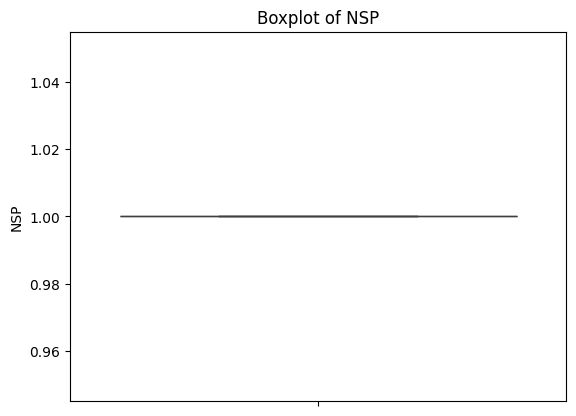

In [10]:
# Creating boxplots for the numerical variables
for column in columns_to_plot:
    sns.boxplot(data_no_outliers, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [11]:
# Histograms for all numerical variables were created to visualize the distribution of data. Each variable's frequency distribution can be analyzed to understand the skewness, modality, and spread.

# Boxplots for each variable were generated to identify outliers and understand the spread and quartiles of the data.

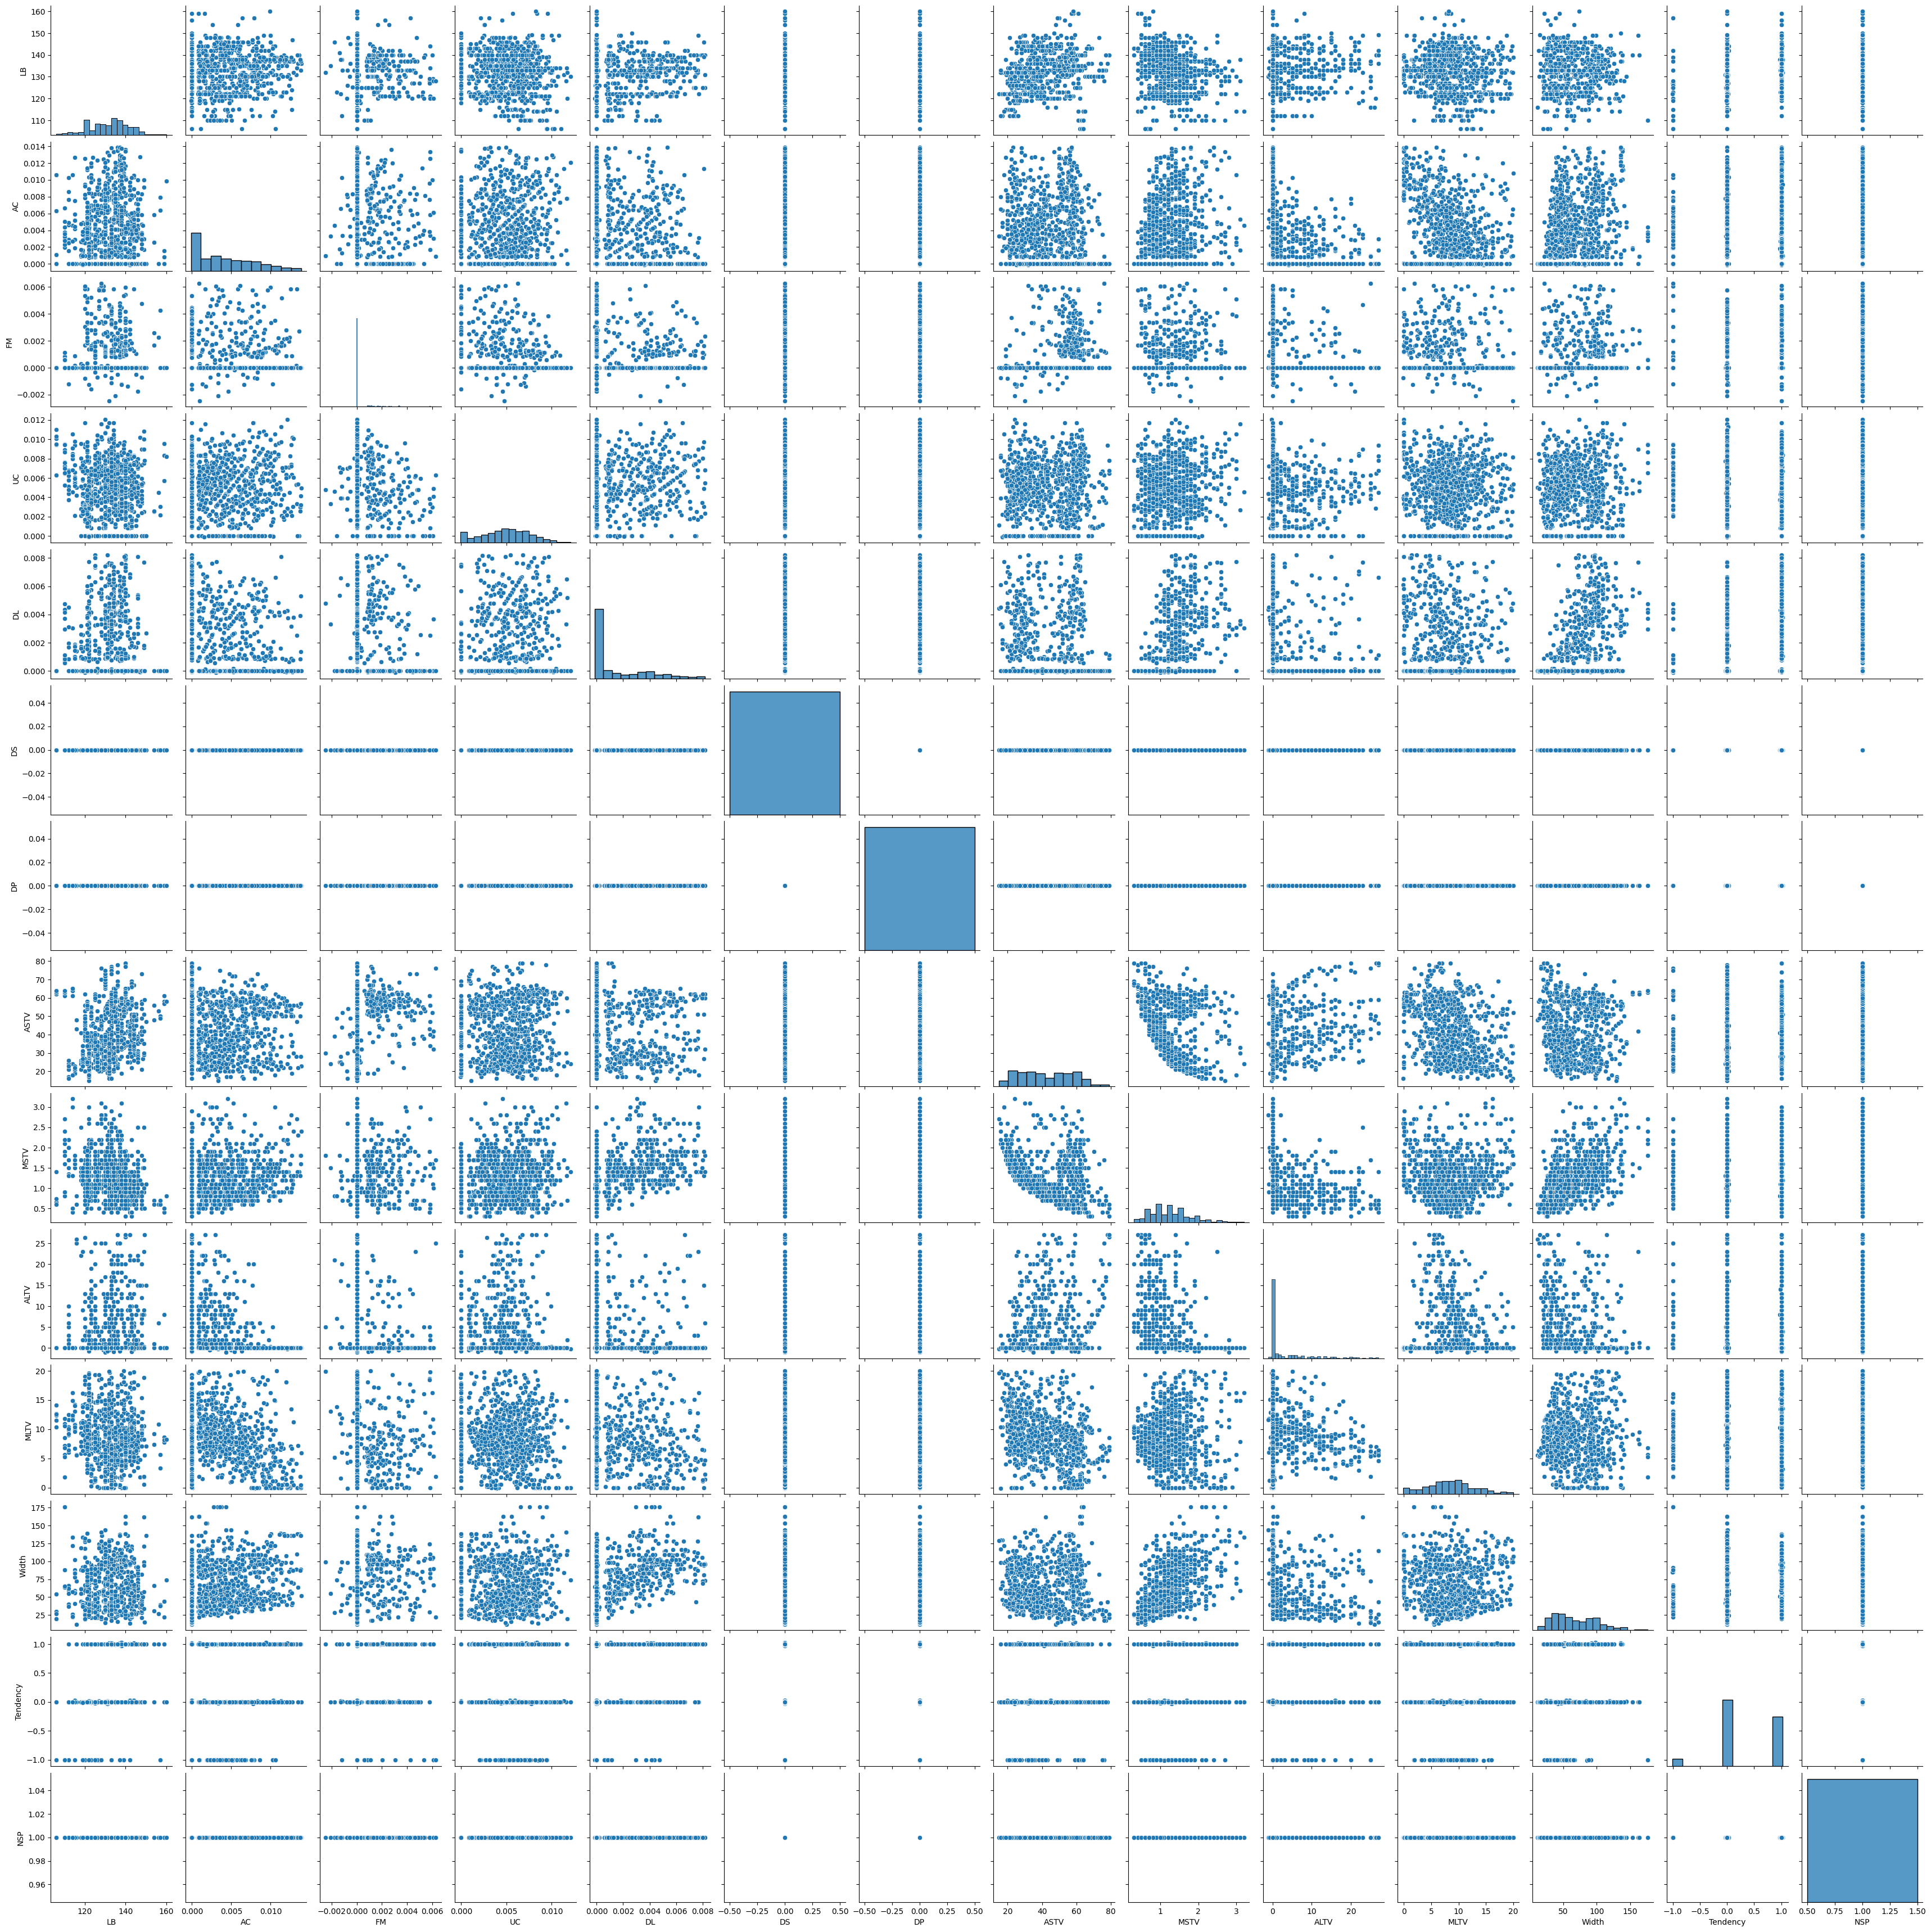

In [12]:
# Generating scatter matrix for all variables in the dataset
fig = sns.pairplot(data_no_outliers,kind='scatter')
plt.show()

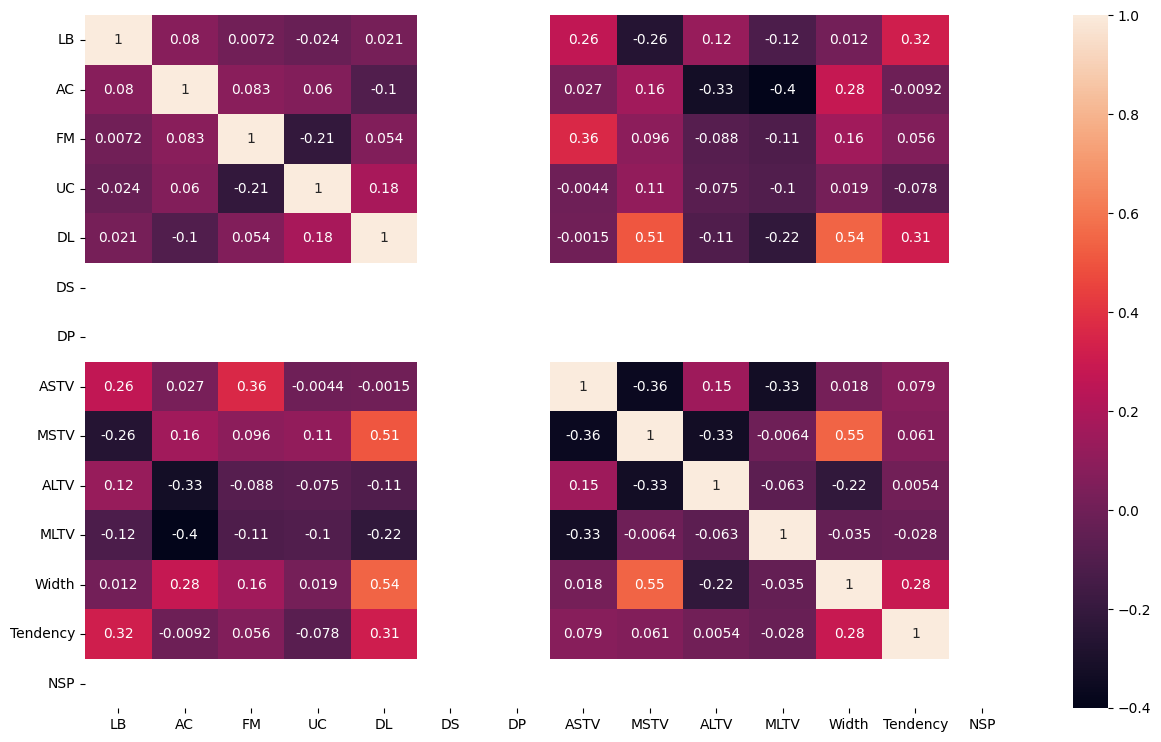

In [13]:
# Generating Correlation Heatmap for all variables in the dataset
plt.subplots(figsize=(15,9))
fig = sns.heatmap(data_no_outliers.corr(),annot=True)
plt.show()

# Conclusion

Based on the Scatter matrix and the Correlation Heatmap we can conclude, that there is strong positive correlation between a few variables namely (MSTV,Width), (DL,Width) and (MSTV,DL). So if any one of these variables increases it also implies that the other two will be increasing. Similarly, there is a strong negative correlation between (MLTV,AC) and (MSTV,ASTV) which indicates that an increase in one variable will result in the decrease of the other variable. Also while observing the stats of the different variables we can see that there are some variables which follow normal distribution 'UC' and 'MLTV' while some appear to be heavily skewed for example 'FM' and 'MSTV'. This implies that there are still some outliers in our dataset.